In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris_bunch = load_iris()

In [2]:
#Creating a dataframe

iris_df = pd.DataFrame(iris_bunch.data , columns = iris_bunch.feature_names)
iris_df["Class"] = iris_bunch.target
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
iris_df["Class"].value_counts()

2    50
1    50
0    50
Name: Class, dtype: int64

In [4]:
# Split the data into X & y

X = iris_df.drop("Class", axis=1)
y = iris_df["Class"]

In [5]:
# Split the data into train and test sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=21)

In [6]:
print("Shape of X_train is : ",X_train.shape)
print("Shape of X_test is : ",X_test.shape)
print("Shape of y_train is : ",y_train.shape)
print("Shape of y_test is : ",y_test.shape)

Shape of X_train is :  (112, 4)
Shape of X_test is :  (38, 4)
Shape of y_train is :  (112,)
Shape of y_test is :  (38,)


LDA always performs well in a normalized dataset.Hence, we are going to normalise our input numerical features.

In [7]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.fit_transform(X_test)

# Implementing LDA on our dataset

In [8]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA 

In [14]:
lda_model = LDA()

X_train_lda = lda_model.fit_transform(X_train_scaled, y_train) #pass both the features and the labels
X_test_lda = lda_model.transform(X_test_scaled) # pass only the features without the labels

In [15]:
print(X_train_lda.shape)
print(X_test_lda.shape)

(112, 2)
(38, 2)


In [18]:
lda_model.explained_variance_ratio_

array([0.99337735, 0.00662265])

**The total number of LDA components generated is equal to number of classes present in the target variable - 1**

In [19]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train_lda, y_train)

KNeighborsClassifier()

In [20]:
pred = knn.predict(X_test_lda)

from sklearn.metrics import accuracy_score
print("Accuracy score of KNN model using LDA components : ", accuracy_score(y_test, pred) )

Accuracy score of KNN model using LDA components :  0.9210526315789473


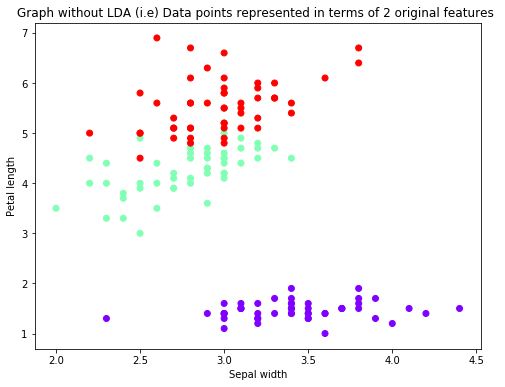

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(iris_df.iloc[:,1],iris_df.iloc[:,2],c=y,cmap='rainbow')
plt.title("Graph without LDA (i.e) Data points represented in terms of 2 original features ")
plt.xlabel('Sepal width')
plt.ylabel('Petal length')
plt.show()

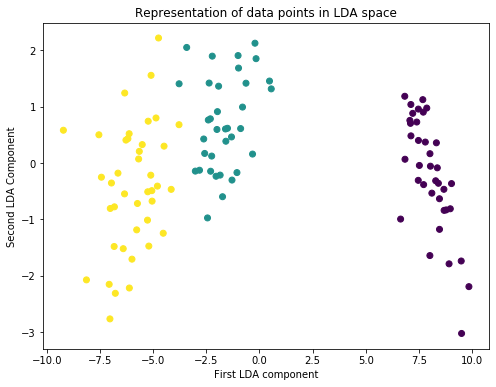

In [28]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
plt.scatter(X_train_lda[:,0],X_train_lda[:,1],c=y_train,cmap='viridis')
plt.title("Representation of data points in LDA space")
plt.xlabel('First LDA component')
plt.ylabel('Second LDA Component')
plt.show()

# End of discussion